![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Web Scraping Single Page

#### Instructions - Scraping popular songs

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

--> **Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.**

<h1 style="color: #00BFFF;">00 |</h1>

In [14]:
# 📚 The good all basics
import pandas as pd # dataframe managment

# 🥣 Let's make a beautiful soup
from bs4 import BeautifulSoup # for web scrapping
import requests # to kindly request to scrape the web

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [2]:
# Firstly, we define a variable with the link to do the web scrapping
link = "https://www.billboard.com/charts/hot-100/"

<h3 style="color: #008080;">The devil is in the details</h3>
Just checking:

In [3]:
try:
    request = requests.get(link)
    request.raise_for_status()  # returns an HTTPError if the response is not OK
    print("All good! Response code is", request.status_code) 
except requests.exceptions.HTTPError as err:
    if request.status_code == 404:
        print("404: Oops, sorry we can't find that page!")
    else:
        print("The error code is", err.args[0]) # look up the 1st argument from HTTPError 

All good! Response code is 200


<h3 style="color: #008080;">Time for a soup</h3>

In [15]:
# Now we parse the HTML content to Pythonic
soup = BeautifulSoup(request.content, "html.parser") # .content returns raw bytes

<h1 style="color: #00BFFF;">02 | Data Processing</h1>

<h3 style="color: #008080;">Getting the song titles</h3>

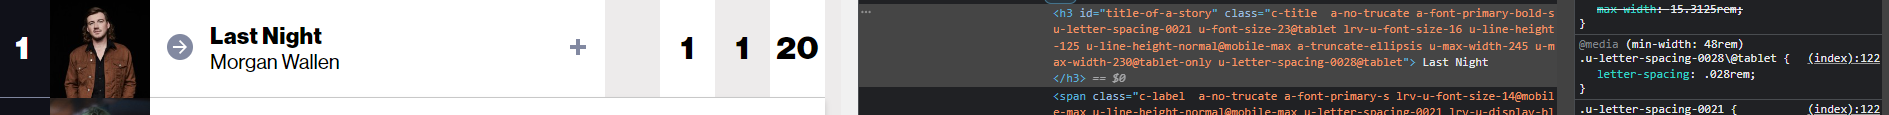

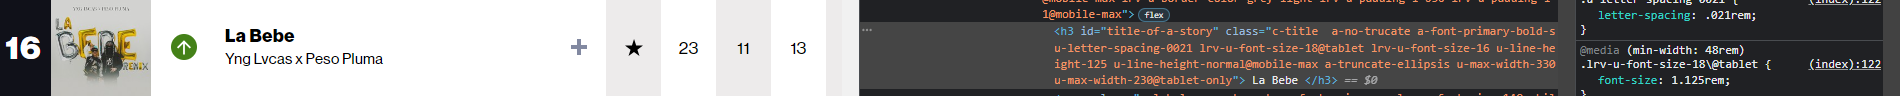

In [5]:
# We select all h3 containers with the specific song class...
# Except for the first song, that has a slightly different structure and we will scrap it with it's unique class
entropy = soup.find_all("h3", attrs={"class": "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet"})
entropy

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Last Night		
 	
 </h3>]

In [6]:
titles = soup.find_all("h3", attrs={"class": "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only"})
len(titles)

99

In [7]:
# We concat it
song_titles = entropy + titles
len(song_titles) # Pythonic magic

100

In [8]:
# Get_text will get all text within the tag, strip=True will remove empty spaces at the start and at the end of the string
songs_clean = [title.get_text(strip=True) for title in song_titles] # muahahahaha (I just like it)

# And we make it to a beautiful pandas df to visualize it
song_df = pd.DataFrame(songs_clean, columns=["Song Titles"])
print(song_df)

         Song Titles
0         Last Night
1            Flowers
2           Fast Car
3          Calm Down
4        All My Life
..               ...
95           Save Me
96        Yandel 150
97              Beso
98  I Wrote The Book
99       Hummingbird

[100 rows x 1 columns]


<h3 style="color: #008080;">Getting the artists names</h3>

In [9]:
# We will repeat the same process as for the song titles
# So, the first song/artist it has a special class
entropy2 = soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet"})
entropy2

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Morgan Wallen
 </span>]

In [10]:
artists_names = soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only"})
len(artists_names)

99

In [11]:
# We concat it... again
song_artists = entropy2 + artists_names
len(song_artists) # Pythonic magic

100

In [12]:
# And we repeat the process with get_text
artist_clean = [title.get_text(strip=True) for title in song_artists] # no evil laugh this time

# And again, a dataframe
artist_df = pd.DataFrame(artist_clean, columns=["Artists"])
print(artist_df)

                          Artists
0                   Morgan Wallen
1                     Miley Cyrus
2                      Luke Combs
3             Rema & Selena Gomez
4      Lil Durk Featuring J. Cole
..                            ...
95  Jelly Roll With Lainey Wilson
96                  Yandel & Feid
97       Rosalia & Rauw Alejandro
98                  Morgan Wallen
99     Metro Boomin & James Blake

[100 rows x 1 columns]


<h1 style="color: #00BFFF;">03 | Reporting</h1>

In [13]:
# We do a final dataframe, concatenating the songs and artists
df = pd.concat([song_df, artist_df], axis=1)
df

,Song Titles,Artists
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs
3,Calm Down,Rema & Selena Gomez
4,All My Life,Lil Durk Featuring J. Cole
...,...,...
95,Save Me,Jelly Roll With Lainey Wilson
96,Yandel 150,Yandel & Feid
97,Beso,Rosalia & Rauw Alejandro
98,I Wrote The Book,Morgan Wallen
